## K近邻分类练习题

在这个练习中，我们使用电信企业的客户流失数据集，Orange_Telecom_Churn_Data.csv（存放在当前目录下）。我们先读入数据集，做一些数据预处理，然后使用K近邻模型根据用户的特点来预测其是否会流失。

### 第一步：
* 将数据集读入变量data中，并查看其前5行。
* 去除其中的“state"，"area_code"和"phone_number"三列。

In [14]:
# 将数据集读入变量data中，并查看其前5行
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')
print(data.head())

  state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0    KS             128        415     382-4657        no             yes   
1    OH             107        415     371-7191        no             yes   
2    NJ             137        415     358-1921        no              no   
3    OH              84        408     375-9999       yes              no   
4    OK              75        415     330-6626       yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...  

In [15]:
# 去除“state"，"area_code"和"phone_number"三列
data = data.drop(['state', 'area_code', 'phone_number'], axis=1)
print(data.head())

   account_length intl_plan voice_mail_plan  number_vmail_messages  \
0             128        no             yes                     25   
1             107        no             yes                     26   
2             137        no              no                      0   
3              84       yes              no                      0   
4              75       yes              no                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0               99            

### 第二步：
* 有些列的值是分类数据，如'intl_plan', 'voice_mail_plan', 'churned'这三列，需要把它们转换成数值数据。

In [16]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])
data.head(5)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 第三步：
* 将除“churned”列之外的所有其他列的数据与“churned”列的数据分开，即创建两张数据表，X_data和y_data。
* 使用课件中提到的某种尺度转换方法（scaling method）来缩放X_data。

In [17]:
# 生成X_data和y_data
X_data = data.drop('churned', axis=1)
y_data = data['churned']

In [18]:
# 缩放X_data
print("\n=== 数据预处理 ===")
categorical_columns = X_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X_data.select_dtypes(include=[np.number]).columns.tolist()

print(f"分类变量: {categorical_columns}")
print(f"数值变量: {numerical_columns}")

# 编码分类变量
X_data_encoded = X_data.copy()
for col in categorical_columns:
    le = LabelEncoder()
    X_data_encoded[col] = le.fit_transform(X_data[col].astype(str))

print("分类变量编码完成")
# 3. 方法1: StandardScaler (标准化)
print("\n" + "="*50)
print("方法1: StandardScaler (标准化)")
print("="*50)

scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X_data_encoded)
X_standard = pd.DataFrame(X_standard, columns=X_data_encoded.columns)

print("特点: 均值=0, 标准差=1")
print("公式: z = (x - μ) / σ")
print(f"数据范围: [{X_standard.min().min():.3f}, {X_standard.max().max():.3f}]")

# 显示前3个数值列的统计信息
print("\n前3个数值列的统计信息:")
for col in numerical_columns[:3]:
    mean_val = X_standard[col].mean()
    std_val = X_standard[col].std()
    print(f"{col}: 均值={mean_val:.6f}, 标准差={std_val:.6f}")



=== 数据预处理 ===
分类变量: []
数值变量: ['account_length', 'intl_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
分类变量编码完成

方法1: StandardScaler (标准化)
特点: 均值=0, 标准差=1
公式: z = (x - μ) / σ
数据范围: [-5.054, 6.336]

前3个数值列的统计信息:
account_length: 均值=-0.000000, 标准差=1.000100
intl_plan: 均值=0.000000, 标准差=1.000100
voice_mail_plan: 均值=0.000000, 标准差=1.000100


### 第四步：
* 创建一个k=3的K近邻模型，并拟合X_data和y_data。

In [19]:
# 创建一个3NN模型，并训练
print("=== 数据准备 ===")
X_train, X_test, y_train, y_test = train_test_split(
    X_standard, y_data, test_size=0.2, random_state=42, stratify=y_data
)

print(f"训练集形状: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"测试集形状: X_test {X_test.shape}, y_test {y_test.shape}")
print(f"训练集目标分布:\n{y_train.value_counts()}")
# 3. 拟合模型
print("\n=== 模型拟合 ===")
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
print("✅ 模型拟合完成!")

# 显示模型信息
print(f"训练样本数: {len(X_train)}")
print(f"特征数量: {X_train.shape[1]}")
print(f"类别数: {len(np.unique(y_train))}")


=== 数据准备 ===
训练集形状: X_train (4000, 17), y_train (4000,)
测试集形状: X_test (1000, 17), y_test (1000,)
训练集目标分布:
churned
0    3434
1     566
Name: count, dtype: int64

=== 模型拟合 ===
✅ 模型拟合完成!
训练样本数: 4000
特征数量: 17
类别数: 2


### 第五步：
* 用上一步训练好的K近邻模型预测相同的数据集，即X_data，并评测预测结果的精度。

In [20]:
# 预测并评价
print("=== 使用KNN模型预测整个数据集 ===")
y_pred_all = knn_model.predict(X_standard)

print("预测完成!")
print(f"预测结果形状: {y_pred_all.shape}")
print(f"前10个预测值: {y_pred_all[:10]}")
print(f"前10个真实值: {y_data.values[:10]}")
# 2. 计算整体精度
print("\n=== 预测精度评估 ===")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

overall_accuracy = accuracy_score(y_data, y_pred_all)
precision = precision_score(y_data, y_pred_all, average='binary')
recall = recall_score(y_data, y_pred_all, average='binary')
f1 = f1_score(y_data, y_pred_all, average='binary')

print(f"整体准确率: {overall_accuracy:.4f}")
print(f"精确率: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1分数: {f1:.4f}")


=== 使用KNN模型预测整个数据集 ===
预测完成!
预测结果形状: (5000,)
前10个预测值: [0 0 0 0 1 0 0 0 0 0]
前10个真实值: [0 0 0 0 0 0 0 0 0 0]

=== 预测精度评估 ===
整体准确率: 0.9326
精确率: 0.9093
召回率: 0.5813
F1分数: 0.7092


### 第六步：
* 构建一个同样是`n_neighbors=3`的模型，但是用距离作为聚集K个近邻预测结果的权重。同样计算此模型在X_data上的预测精度。 
* 构建另一个K近邻模型：使用均匀分布的权重，但是将闵科夫斯基距离中的指数参数设为1(`p=1`)，即使用曼哈顿距离。

In [21]:
# n_neighbors=3, weights='distance'
# 1. 构建距离加权的KNN模型 (k=3)
print("=== 模型1: 距离加权的KNN (k=3) ===")
knn_distance_weighted = KNeighborsClassifier(
    n_neighbors=3, 
    weights='distance',  # 使用距离作为权重
    metric='minkowski', 
    p=2  # 欧几里得距离
)

# 训练模型（使用相同的训练数据）
knn_distance_weighted.fit(X_train, y_train)
print("✅ 距离加权KNN模型训练完成!")
print(f"权重方式: {knn_distance_weighted.weights}")
print(f"距离度量: {knn_distance_weighted.metric} (p={knn_distance_weighted.p})")
# 2. 预测并评估距离加权模型
print("\n=== 距离加权模型预测 ===")
y_pred_distance = knn_distance_weighted.predict(X_standard)

# 计算精度指标
accuracy_distance = accuracy_score(y_data, y_pred_distance)
precision_distance = precision_score(y_data, y_pred_distance, average='binary')
recall_distance = recall_score(y_data, y_pred_distance, average='binary')
f1_distance = f1_score(y_data, y_pred_distance, average='binary')

print(f"整体准确率: {accuracy_distance:.4f}")
print(f"精确率: {precision_distance:.4f}")
print(f"召回率: {recall_distance:.4f}")
print(f"F1分数: {f1_distance:.4f}")

=== 模型1: 距离加权的KNN (k=3) ===
✅ 距离加权KNN模型训练完成!
权重方式: distance
距离度量: minkowski (p=2)

=== 距离加权模型预测 ===
整体准确率: 0.9790
精确率: 0.9674
召回率: 0.8812
F1分数: 0.9223


In [22]:
# n_neighbors=3, p=1
print("\n=== 模型2: 曼哈顿距离KNN (k=3, p=1) ===")
knn_manhattan = KNeighborsClassifier(
    n_neighbors=3,
    weights='uniform',  # 均匀权重
    metric='minkowski',
    p=1  # 曼哈顿距离
)

# 训练模型
knn_manhattan.fit(X_train, y_train)
print("✅ 曼哈顿距离KNN模型训练完成!")
print(f"距离度量: 曼哈顿距离 (p=1)")
print(f"权重方式: {knn_manhattan.weights}")
# 4. 预测并评估曼哈顿距离模型
print("\n=== 曼哈顿距离模型预测 ===")
y_pred_manhattan = knn_manhattan.predict(X_standard)

# 计算精度指标
accuracy_manhattan = accuracy_score(y_data, y_pred_manhattan)
precision_manhattan = precision_score(y_data, y_pred_manhattan, average='binary')
recall_manhattan = recall_score(y_data, y_pred_manhattan, average='binary')
f1_manhattan = f1_score(y_data, y_pred_manhattan, average='binary')

print(f"整体准确率: {accuracy_manhattan:.4f}")
print(f"精确率: {precision_manhattan:.4f}")
print(f"召回率: {recall_manhattan:.4f}")
print(f"F1分数: {f1_manhattan:.4f}")


=== 模型2: 曼哈顿距离KNN (k=3, p=1) ===
✅ 曼哈顿距离KNN模型训练完成!
距离度量: 曼哈顿距离 (p=1)
权重方式: uniform

=== 曼哈顿距离模型预测 ===
整体准确率: 0.9370
精确率: 0.9242
召回率: 0.6040
F1分数: 0.7305


### 第七步：
* 将K值从1变化到20，训练20个不同的K近邻模型。权重使用均匀分布的权重（缺省的）。闵科夫斯基距离的指数参数(`p`)可以设为1或者2（只要一致即可）。将每个模型得到的精度和其`k`值存到一个列表或字典中。
* 将`accuracy`和`k`的关系绘成图表。当`k=1`时，你观察到了什么? 为什么?

In [23]:
print("=== 训练k=1到20的KNN模型 ===")
k_values = range(1, 21)
accuracy_results = []
models = {}

for k in k_values:
    # 创建KNN模型（均匀权重，p=2欧氏距离）
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    
    # 训练模型
    knn.fit(X_train, y_train)
    
    # 在整个数据集上预测
    y_pred = knn.predict(X_standard)
    
    # 计算准确率
    accuracy = accuracy_score(y_data, y_pred)
    accuracy_results.append(accuracy)
    models[k] = knn
    
    print(f"k={k:2d} - 准确率: {accuracy:.4f}")

# 保存结果到DataFrame
results_df = pd.DataFrame({
    'k': k_values,
    'accuracy': accuracy_results
})

print(f"\n最佳k值: k={results_df.loc[results_df['accuracy'].idxmax(), 'k']}")
print(f"最佳准确率: {results_df['accuracy'].max():.4f}")


=== 训练k=1到20的KNN模型 ===
k= 1 - 准确率: 0.9760
k= 2 - 准确率: 0.9134
k= 3 - 准确率: 0.9326
k= 4 - 准确率: 0.9086
k= 5 - 准确率: 0.9224
k= 6 - 准确率: 0.9062
k= 7 - 准确率: 0.9156
k= 8 - 准确率: 0.9036
k= 9 - 准确率: 0.9106
k=10 - 准确率: 0.9000
k=11 - 准确率: 0.9094
k=12 - 准确率: 0.8976
k=13 - 准确率: 0.9058
k=14 - 准确率: 0.8954
k=15 - 准确率: 0.9020
k=16 - 准确率: 0.8920
k=17 - 准确率: 0.8966
k=18 - 准确率: 0.8894
k=19 - 准确率: 0.8968
k=20 - 准确率: 0.8900

最佳k值: k=1
最佳准确率: 0.9760



=== Accuracy与k值关系图 ===


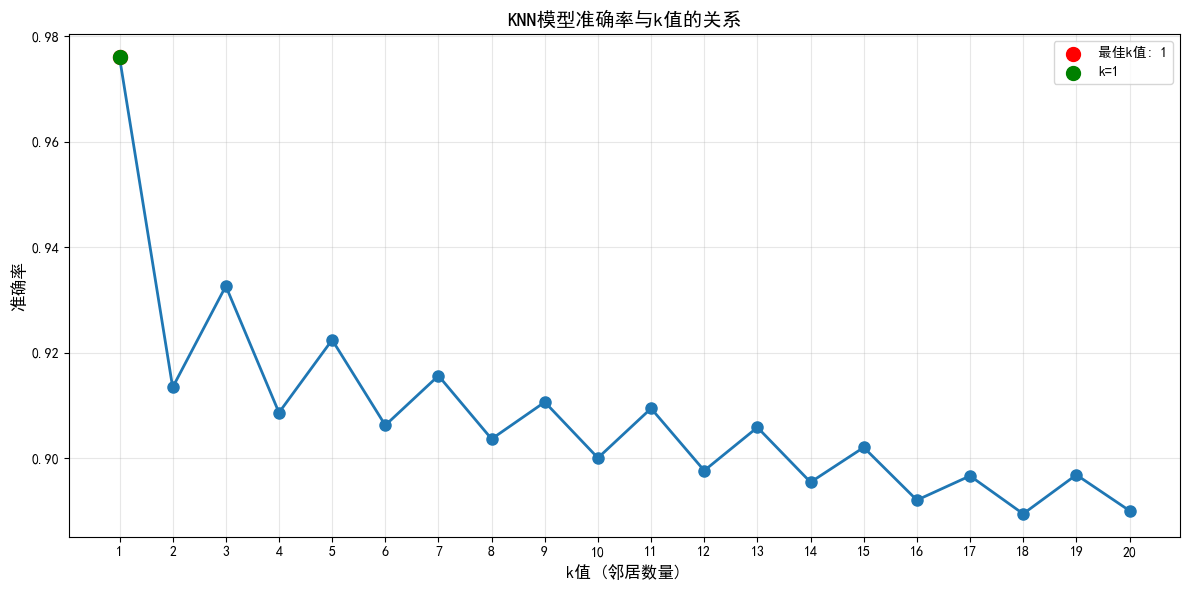

In [24]:
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # 用SimHei显示中文，DejaVu Sans作为备选
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

print("\n=== Accuracy与k值关系图 ===")
plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['accuracy'], marker='o', linewidth=2, markersize=8)
plt.title('KNN模型准确率与k值的关系', fontsize=14, fontweight='bold')
plt.xlabel('k值 (邻居数量)', fontsize=12)
plt.ylabel('准确率', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# 标记最佳点
best_idx = results_df['accuracy'].idxmax()
best_k = results_df.loc[best_idx, 'k']
best_accuracy = results_df.loc[best_idx, 'accuracy']
plt.scatter(best_k, best_accuracy, color='red', s=100, zorder=5, label=f'最佳k值: {best_k}')

# 标记k=1的点
k1_accuracy = results_df.loc[0, 'accuracy']
plt.scatter(1, k1_accuracy, color='green', s=100, zorder=5, label='k=1')

plt.legend()
plt.tight_layout()
plt.show()